<a href="https://colab.research.google.com/github/akhilp90/DV/blob/main/DV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Plants vs sunlight


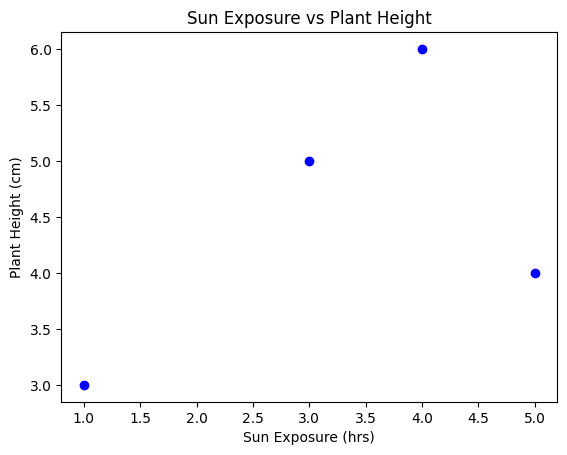

T-statistic: 0.916515138991168
P-value: 0.21349130944773864
There is no statistically significant positive relationship between plant height and sun exposure.
Correlation Coefficient: 0.5291502622129182
There is a positive relationship between plant height and sun exposure.


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t

data = {
    "plant_name" :["plant 1", "plant 2", "plant 3", "plant 4"],
    "sun_exp(hrs)" : [3,4,5,6],
    "plant_height(cm)" : [1,5,3,4]
}

df = pd.DataFrame(data)

plt.scatter(df["plant_height(cm)"],df["sun_exp(hrs)"],color='blue')
plt.title("Sun Exposure vs Plant Height")
plt.ylabel("Plant Height (cm)")
plt.xlabel("Sun Exposure (hrs)")
plt.show()

x= df["sun_exp(hrs)"]
y = df["plant_height(cm)"]

y_mean = np.mean(y)
x_mean = np.mean(x)

numerator = np.sum((x-x_mean)*(y-y_mean))
denominator = np.sqrt(sum((x-x_mean)**2)*sum((y-y_mean)**2))

n = len(x)
t_statistic = correlation_coefficient * np.sqrt(n-1 // (1-correlation_coefficient**2))
p_value = 1-t.cdf(abs(t_statistic),df=n-1)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("There is a statistically significant positive relationship between plant height and sun exposure.")
else:
    print("There is no statistically significant positive relationship between plant height and sun exposure.")

correlation_coefficient = numerator/denominator

print("Correlation Coefficient:", correlation_coefficient)

if correlation_coefficient > 0:
    print("There is a positive relationship between plant height and sun exposure.")
elif  correlation_coefficient == 0:
    print("There is no positive relationship between plant height and sun exposure.")
else  :
   print("Negative Correlation coefficient between plant height and sun exposure")

2. Solar panel vs temp

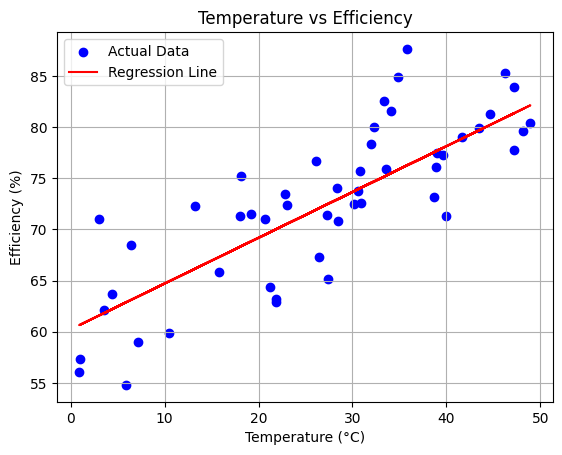

F-Statistic: 57.88
P-Value (F-test): 0.0000
T-Statistic for Temperature: 7.61
P-Value (T-test) for Temperature: 0.0000
The regression coefficient for temperature is statistically significant.
The temperature significantly predicts the efficiency of solar panels.


<ipython-input-42-cf095e4d815e>:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_statistic = model.tvalues[1]  # Coefficient for temperature (index 1)
<ipython-input-42-cf095e4d815e>:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_t = model.pvalues[1]  # P-value for temperature coefficient


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("solar_efficiency_temp.csv")

# Assign the columns to variables
temperature= data['temperature']
efficiency = data['efficiency']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(temperature,efficiency, test_size=0.25, random_state=42)

# Reshape X_train and X_test for adding a constant (intercept term) since they are currently 1D
X_train = sm.add_constant(X_train)  # Adds constant for intercept
X_test = sm.add_constant(X_test)

# a. Develop the Simple Linear Regression Model using training data
model = sm.OLS(y_train, X_train).fit()

# Predict on the test set
y_pred = model.predict(X_test)

# Visualize the regression
plt.scatter(temperature,efficiency, color="blue", label="Actual Data")

# Plot the regression line for the training data
plt.plot(X_train['temperature'], model.predict(X_train), color="red", label="Regression Line")

# Add labels and title
plt.title("Temperature vs Efficiency")
plt.xlabel("Temperature (°C)")
plt.ylabel("Efficiency (%)")
plt.legend()
plt.grid(True)
plt.show()

# b. Perform an F-test
f_statistic = model.fvalue
p_value_f = model.f_pvalue
print(f"F-Statistic: {f_statistic:.2f}")
print(f"P-Value (F-test): {p_value_f:.4f}")

# c. Conduct a t-test for the Regression Coefficient
t_statistic = model.tvalues[1]  # Coefficient for temperature (index 1)
p_value_t = model.pvalues[1]  # P-value for temperature coefficient
print(f"T-Statistic for Temperature: {t_statistic:.2f}")
print(f"P-Value (T-test) for Temperature: {p_value_t:.4f}")


if p_value_t < 0.05:
    print("The regression coefficient for temperature is statistically significant.")
else:
    print("The regression coefficient for temperature is NOT statistically significant.")

if p_value_f < 0.05:
    print("The temperature significantly predicts the efficiency of solar panels.")
else:
    print("The temperature does NOT significantly predicts the efficiency of solar panels.")


3) Student

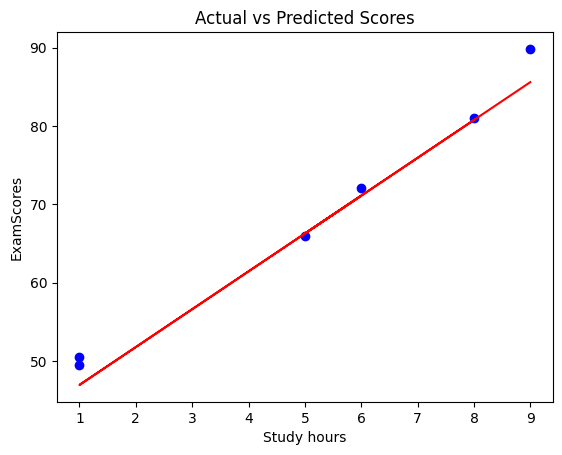

mse : 6.353087473532352
r2 : 0.9710368865999279


In [37]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("student_data.csv")
df.head()
X=df[["StudyHours"]]
y=df["ExamScore"]
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

plt.scatter(X_test,y_test,color='blue',label='Actual Data')
plt.plot(X_test,y_pred,color='red',label='Regression Line(Predicted Data)')
plt.xlabel("Study hours")
plt.ylabel("ExamScores")
plt.title("Actual vs Predicted Scores")
plt.show()

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("mse :",mse)
print("r2 :",r2)

5)Iris

The KNN Classifier is 100% accurate


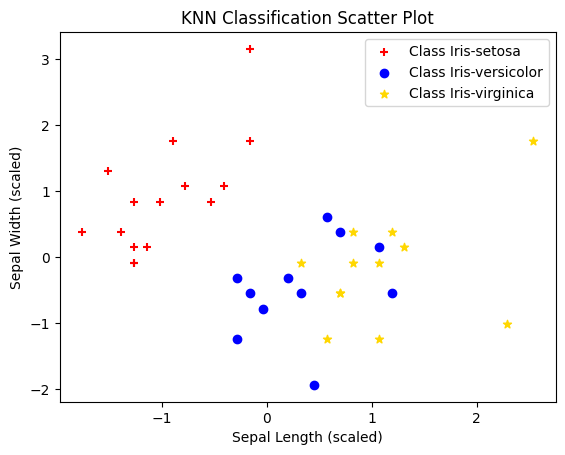

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv("iris_dataset.csv")
df.head()

X = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
Y = df["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

encoder = LabelEncoder()

Y_train_enc = encoder.fit_transform(Y_train)
Y_test_enc = encoder.transform(Y_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, Y_train_enc)
Y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(Y_test_enc, Y_pred)
print(f"The KNN Classifier is {accuracy * 100:.0f}% accurate")

labels = encoder.classes_

markers = ["+", "o", "*"]
colors = ["red", "blue", "gold"]

for i, label in enumerate(labels):
    class_points = (Y_pred == i)
    plt.scatter(X_test_scaled[class_points, 0], X_test_scaled[class_points, 1], label=f'Class {label}', marker=markers[i], color=colors[i])
    plt.title("KNN Classification Scatter Plot")
    plt.xlabel("Sepal Length (scaled)")
    plt.ylabel("Sepal Width (scaled)")
    plt.legend()

4) sales


Model Evaluation:
Mean Squared Error (MSE): 673031.44
R-squared: 0.9153

Interpretation of Coefficients:
Intercept: 3067.384229403592
Advertising Expenditure Coefficient: 2.1481790209110674
Store Location Coefficient: 2219.7028437185854
Competition Coefficient: 2304.8978409641986

F-Statistic: 140.47
P-Value (F-test): 0.0000

T-Statistics and P-Values for Coefficients:
                              Coef.    Std.Err.          t         P>|t|  \
const                   3067.384229  716.362551   4.281888  3.639445e-04   
AdvertisingExpenditure     2.148179    0.194975  11.017698  6.053971e-10   
StoreLocation           2219.702844  469.012365   4.732717  1.273827e-04   
Competition             2304.897841  459.761419   5.013248  6.666946e-05   

                             [0.025       0.975]  
const                   1573.078134  4561.690325  
AdvertisingExpenditure     1.741468     2.554890  
StoreLocation           1241.360194  3198.045493  
Competition             1345.852326  3263.

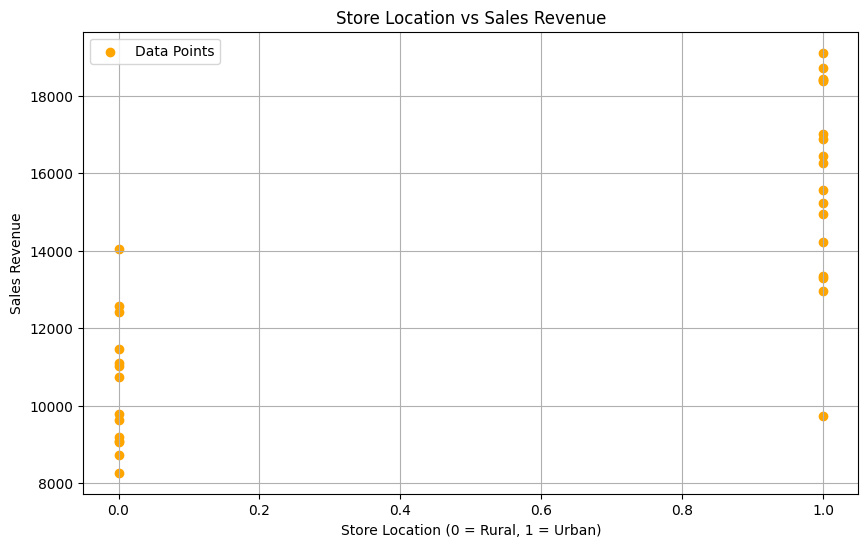

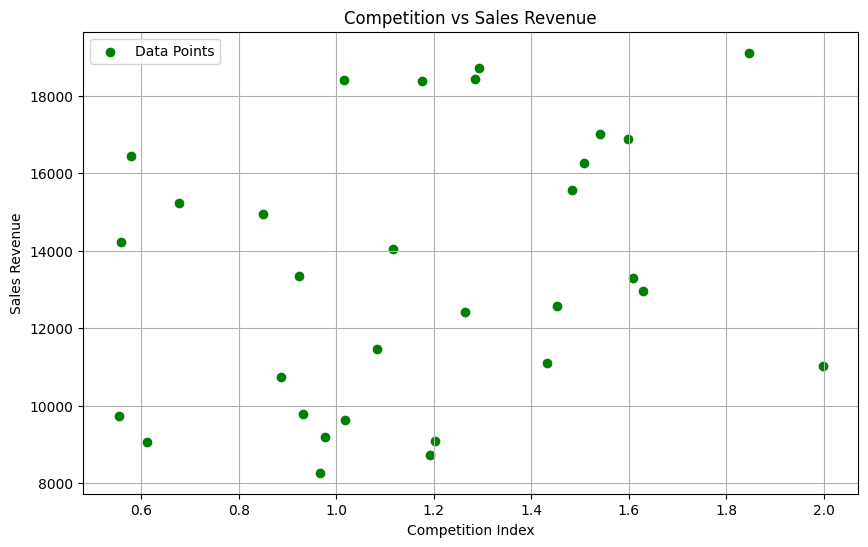

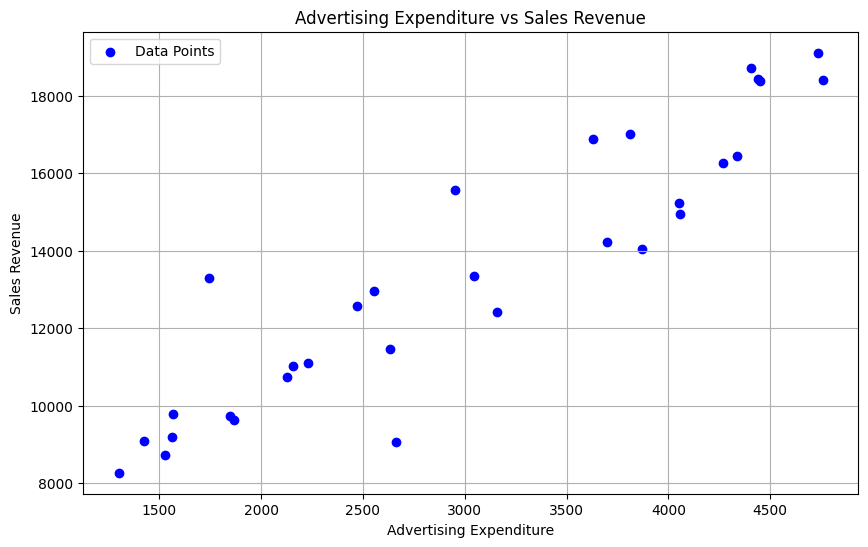

In [6]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("sales.csv")

# Split predictors (X) and response (y)
X = data[['AdvertisingExpenditure', 'StoreLocation', 'Competition']]
y = data['SalesRevenue']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant (intercept) to the predictors
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit the model
model = sm.OLS(y_train, X_train_sm).fit()

# Predict on the test set
y_pred = model.predict(X_test_sm)

# Evaluate model performance on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.4f}")

# Interpret coefficients
print("\nInterpretation of Coefficients:")
print("Intercept:", model.params['const'])
print("Advertising Expenditure Coefficient:", model.params['AdvertisingExpenditure'])
print("Store Location Coefficient:", model.params['StoreLocation'])
print("Competition Coefficient:", model.params['Competition'])


# Perform an F-test
f_statistic = model.fvalue
p_value_f = model.f_pvalue
print(f"\nF-Statistic: {f_statistic:.2f}")
print(f"P-Value (F-test): {p_value_f:.4f}")

# Perform t-tests for each coefficient
print("\nT-Statistics and P-Values for Coefficients:")
print(model.summary2().tables[1])

# Graph 1: Store Location vs Sales Revenue
plt.figure(figsize=(10, 6))
plt.scatter(data['StoreLocation'], data['SalesRevenue'], color="orange", label="Data Points")
plt.title("Store Location vs Sales Revenue")
plt.xlabel("Store Location (0 = Rural, 1 = Urban)")
plt.ylabel("Sales Revenue")
plt.grid(True)
plt.legend()
plt.show()

# Graph 2: Competition vs Sales Revenue
plt.figure(figsize=(10, 6))
plt.scatter(data['Competition'], data['SalesRevenue'], color="green", label="Data Points")
plt.title("Competition vs Sales Revenue")
plt.xlabel("Competition Index")
plt.ylabel("Sales Revenue")
plt.grid(True)
plt.legend()
plt.show()

# Graph 3: Advertising Expenditure vs Sales Revenue
plt.figure(figsize=(10, 6))
plt.scatter(data['AdvertisingExpenditure'], data['SalesRevenue'], color="blue", label="Data Points")
plt.title("Advertising Expenditure vs Sales Revenue")
plt.xlabel("Advertising Expenditure")
plt.ylabel("Sales Revenue")
plt.grid(True)
plt.legend()
plt.show()


6) Income

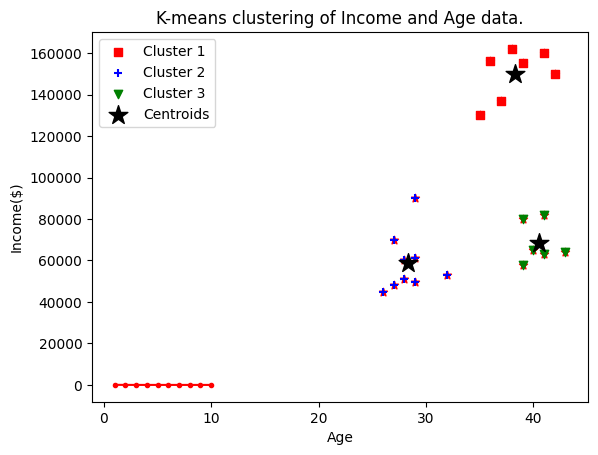

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = pd.read_csv("income_clustering.csv")
df = df[["Age", "Income($)"]]

scaler = StandardScaler()
sc_df = scaler.fit_transform(df)

plt.scatter(df["Age"], df["Income($)"], color="r", marker="*")  ## execute this in separate cell
plt.title("Age vs Income")
plt.xlabel("Age")
plt.ylabel("Income")  #up to here

k_range = range(1, 11)
sse = []
for k in k_range:
    kmn = KMeans(n_clusters=k)
    kmn.fit(sc_df)
    sse.append(kmn.inertia_)

plt.plot(k_range, sse, color="r", marker=".")  #write this in separet cell here

kmn = KMeans(n_clusters=3)
clusters = kmn.fit_predict(sc_df)

df['clusters'] = clusters
df.head()

cl1 = df[df['clusters'] == 0]
cl2 = df[df['clusters'] == 1]
cl3 = df[df['clusters'] == 2]

centroids = scaler.inverse_transform(kmn.cluster_centers_)

plt.title("K-means clustering of Income and Age data.")  # write this in separate cell
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.scatter(cl1['Age'], cl1['Income($)'], color="r", marker="s", label="Cluster 1")
plt.scatter(cl2['Age'], cl2['Income($)'], color="b", marker="+", label="Cluster 2")
plt.scatter(cl3['Age'], cl3['Income($)'], color="g", marker="v", label="Cluster 3")
plt.scatter(centroids[:, 0], centroids[:, 1], label="Centroids", s=200, marker="*", color="black")
plt.legend()